In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder,StandardScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings
warnings.filterwarnings('ignore')
df = pd.read_csv('autism_dataset (1).csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [2]:
df.shape

(800, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [6]:
df['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [7]:
df=df.replace({'yes':1,'no':0,'?':'Others','other':'Others'})

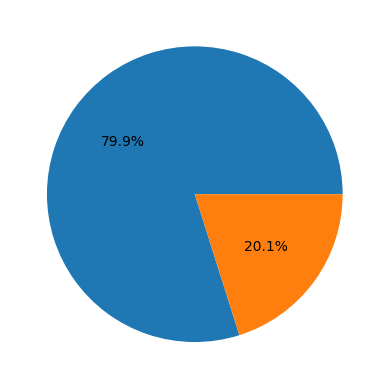

In [8]:
plt.pie(df['Class/ASD'].value_counts().values,autopct='%1.1f%%')
plt.show()

In [9]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
# Using pandas' select_dtypes method to separate columns by dtype
int_columns = df.select_dtypes(include=['int64', 'int32']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()
float_columns = df.select_dtypes(include=['float64', 'float32']).columns.tolist()

# Print results
print("Integer columns:", int_columns)
print("Object columns:", object_columns)
print("Float columns:", float_columns)


Integer columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']
Object columns: ['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']
Float columns: ['age', 'result']


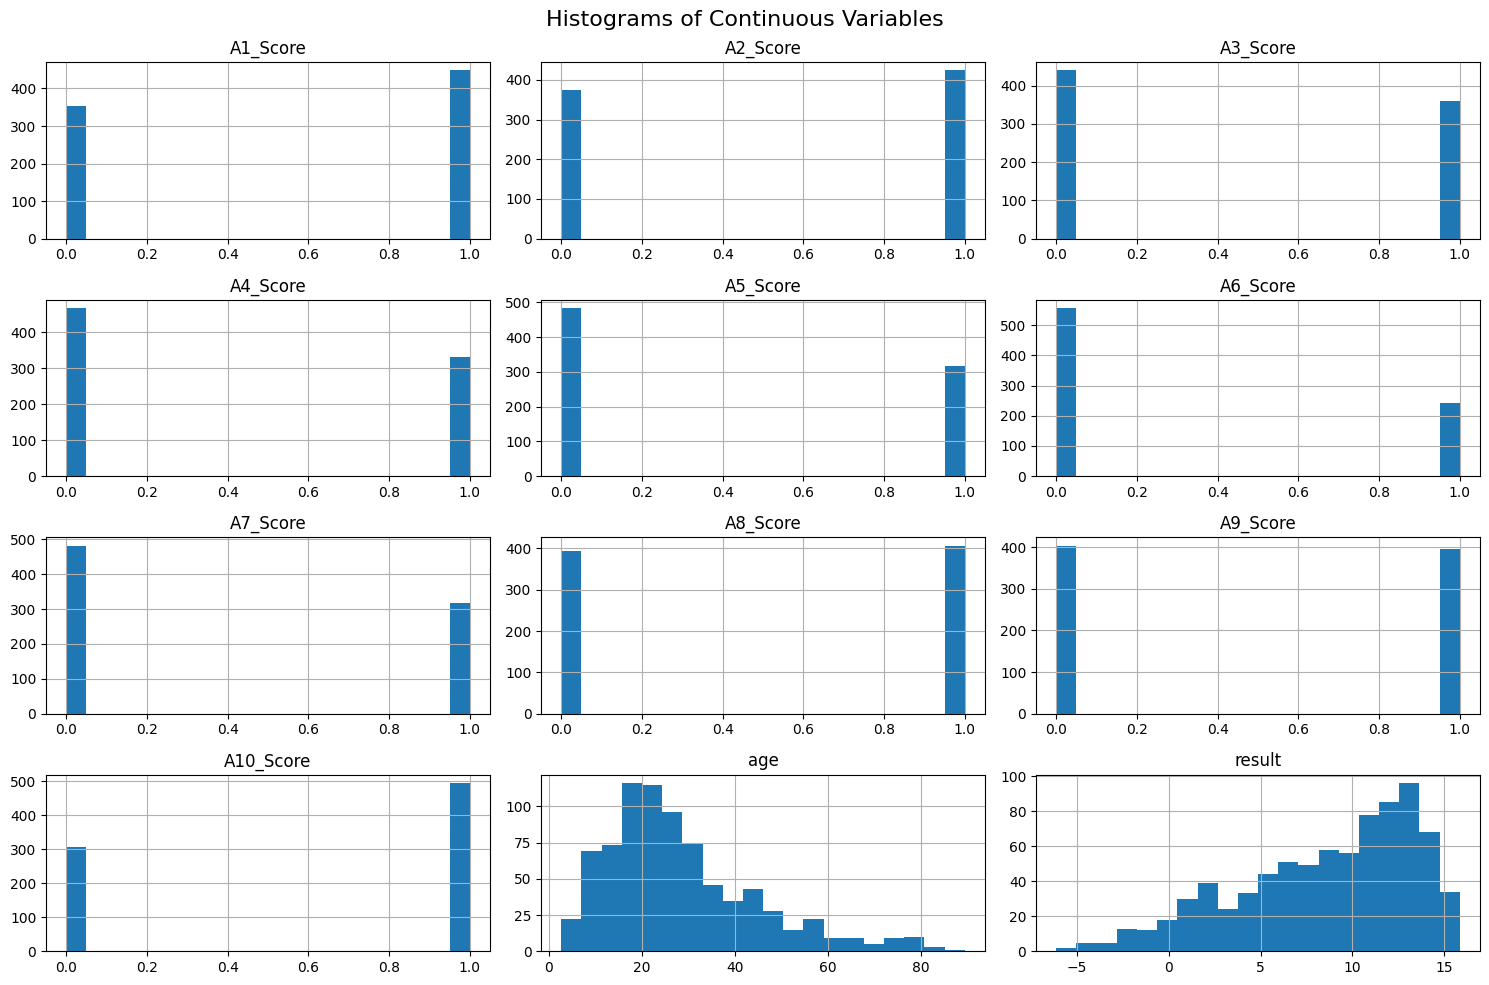

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for continuous variables
def plot_histograms(df):
    continuous_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

    # Create subplots
    df[continuous_columns].hist(bins=20, figsize=(15, 10))
    plt.suptitle('Histograms of Continuous Variables', fontsize=16)
    plt.tight_layout()
    plt.show()

# 2. Boxplot for continuous variables (to check outliers)
def plot_boxplots(df):
    continuous_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[continuous_columns], orient='h')
    plt.title('Boxplots of Continuous Variables', fontsize=16)
    plt.show()

# Plot Histograms
plot_histograms(df)






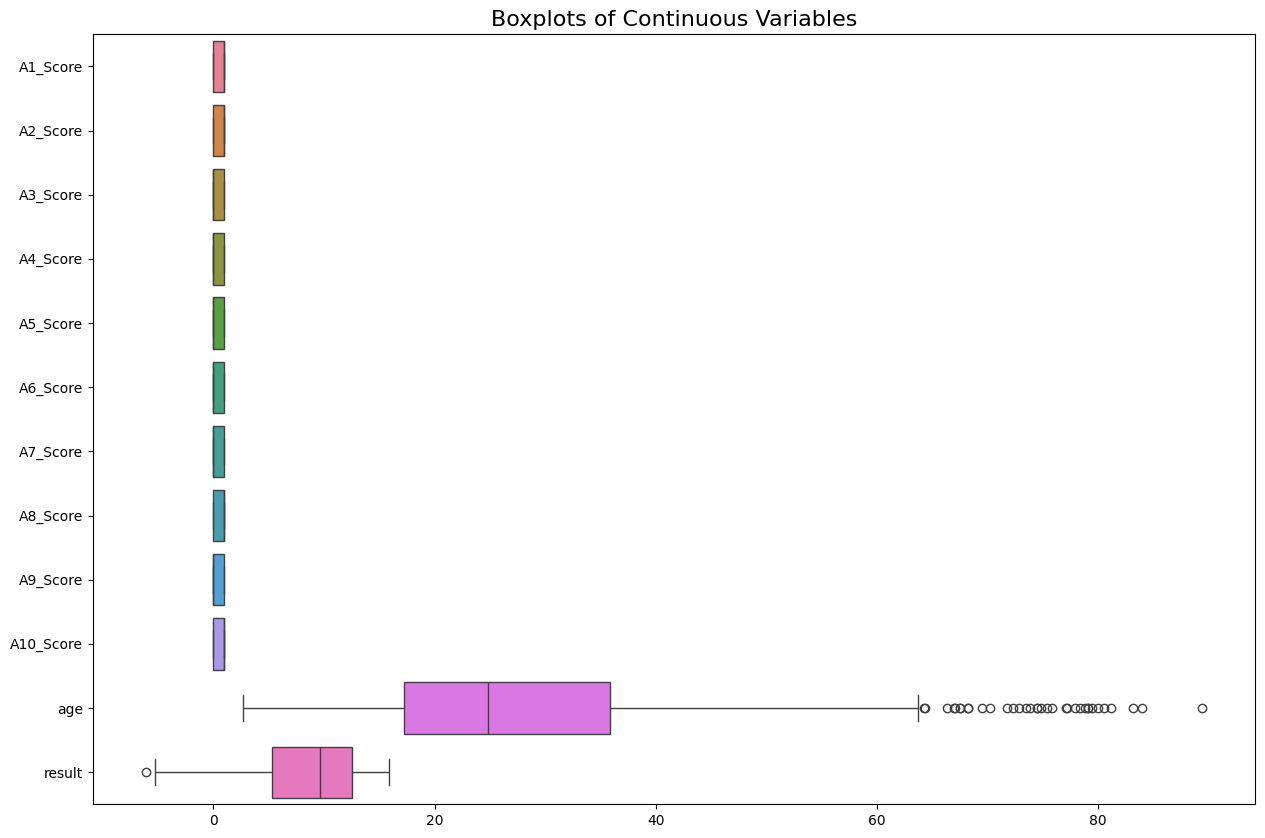

In [55]:
# 2. Boxplot for continuous variables (to check outliers)
def plot_boxplots(df):
    continuous_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[continuous_columns], orient='h')
    plt.title('Boxplots of Continuous Variables', fontsize=16)
    plt.show()

# Plot Boxplots
plot_boxplots(df)

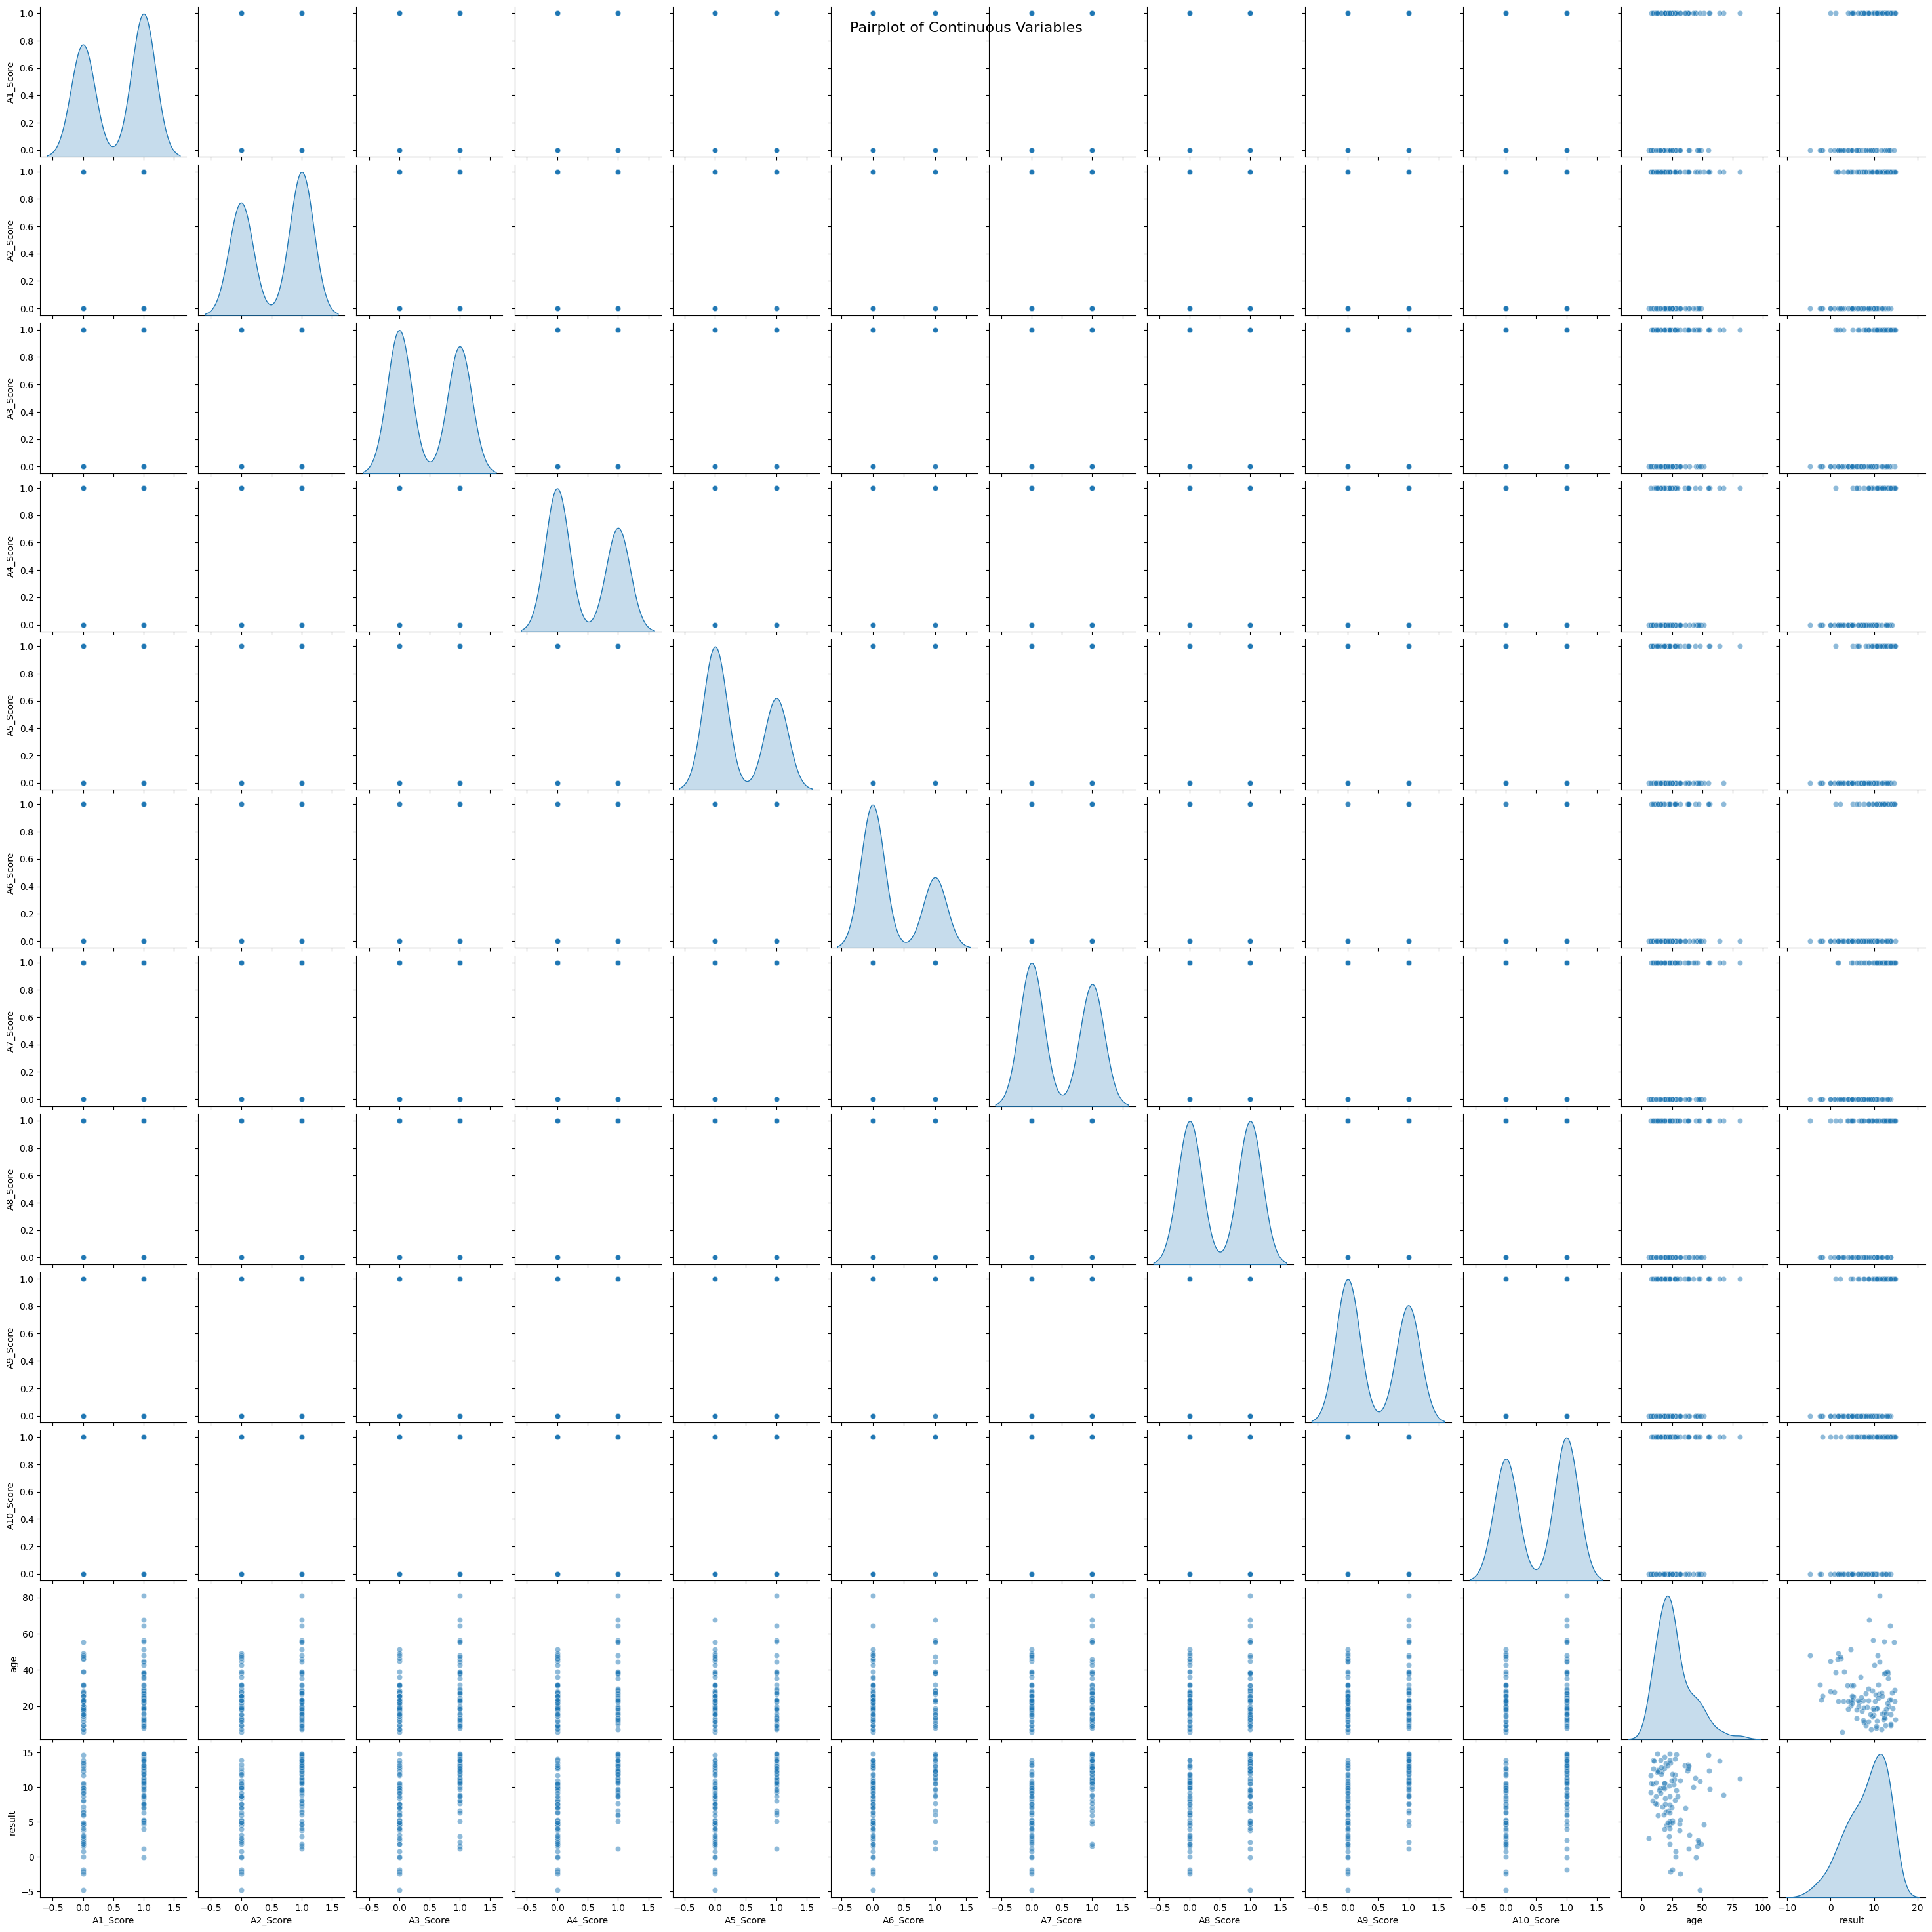

In [54]:

# 3. Pairplot to visualize relationships between variables
def plot_pairplot(df):
    continuous_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

    # Selecting a subset of continuous variables for clarity
    sns.pairplot(df[continuous_columns].sample(100), diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle('Pairplot of Continuous Variables', fontsize=16)
    plt.show()
# Plot Pairplot
plot_pairplot(df)



In [13]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    if df[col].dtype == 'float64':
      val = df[col].median()
      df[col] = df[col].fillna(val)
    else:
      df = df.dropna(subset=df.select_dtypes(include=['object'])).columns

In [14]:
df = df.drop(df[df['age'] == 383].index)

In [15]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(df[i].value_counts())
        print("\n")

gender
m    530
f    270
Name: count, dtype: int64


ethnicity
White-European     257
Others             232
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64


contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  

In [16]:
df.drop(columns="age_desc",inplace=True)

In [17]:
df['relation']=df['relation'].replace('?','Others')
df['ethnicity'] = df['ethnicity'].replace({'?':'Others','others':'Others'})

In [18]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(df[i].value_counts())
        print("\n")

gender
m    530
f    270
Name: count, dtype: int64


ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64


contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam             

In [19]:
print(df['Class/ASD'].value_counts(),"\n",df['austim'].value_counts())

Class/ASD
0    639
1    161
Name: count, dtype: int64 
 austim
0    669
1    131
Name: count, dtype: int64


In [20]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

cols_to_encode = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']
# Apply label encoding to X
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# Apply label encoding to y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

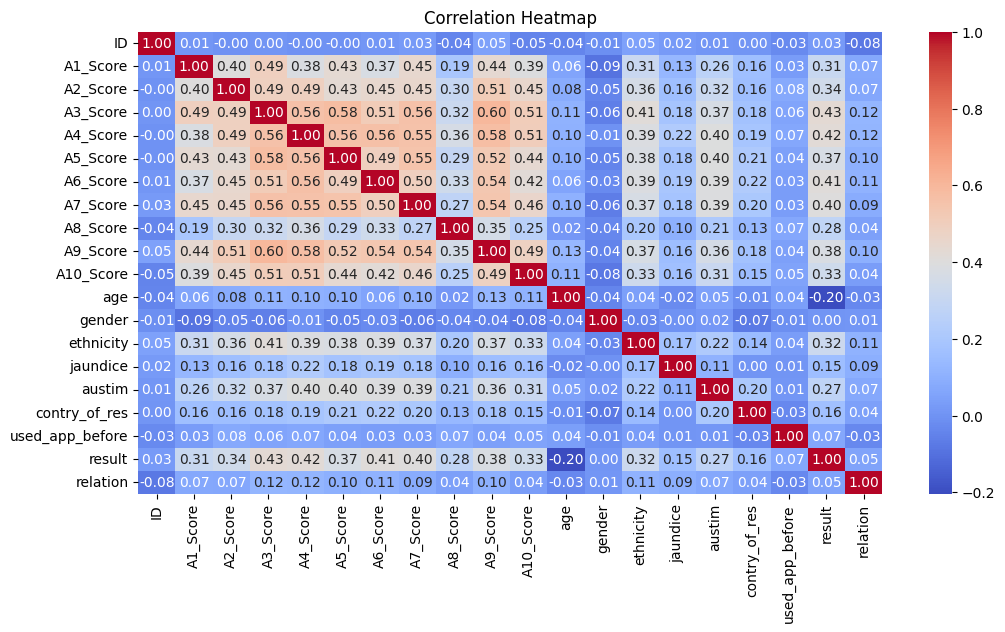

In [22]:
import seaborn as sns
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
def normalizer_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Handing data imbalance
def augment_data(X, y, method='smote'):
  if method == 'smote':
    sampler = SMOTE(random_state=10)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  elif method == 'randomoversampler':
    sampler = RandomOverSampler(random_state=11)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  return X_resampled, y_resampled


def plot_class_distribution(y_train):
  class_distribution = pd.Series(y_train).value_counts()
  plt.figure(figsize=(8, 6))
  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
  plt.title('Class Distribution in Training Data')
  plt.xlabel('Class')
  plt.ylabel('Number of Samples')
  plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = normalizer_features(X_train, X_test)

Training set size: (1030, 20)



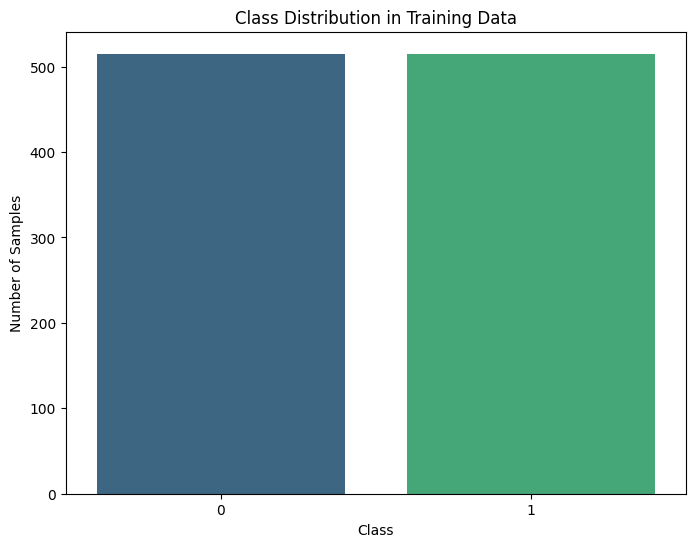

In [25]:
X_train_rov, y_train_rov = augment_data(X_train, y_train, method='randomoversampler')
print(f"Training set size: {X_train_rov.shape}\n")
plot_class_distribution(y_train_rov)

In [27]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Training set size: (1030, 20)



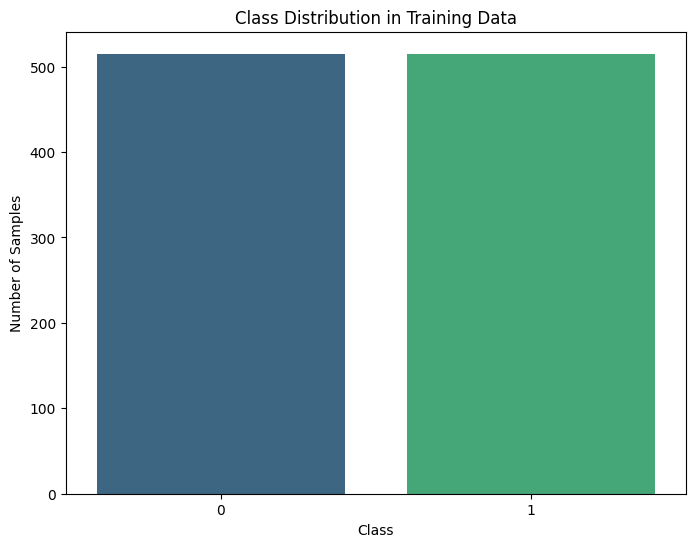

In [28]:
X_train_smote, y_train_smote = augment_data(X_train, y_train, method='smote')

print(f"Training set size: {X_train_smote.shape}\n")
plot_class_distribution(y_train_smote)

In [29]:
def Model_ML(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=False)
    scores = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Training model
        model.fit(X_train, y_train)

        # Predict on the test set of each k-fold
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    print(f"Accuracy on each fold: {scores}")
    print(f"Mean accuracy: {round(sum(scores) / len(scores)*100, 2)}%\n")
    return model

In [30]:
def Gridsearch_params(X, y, model, param_grid, k=5):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=k,  # number of fold
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X, y)
    # Get the best model
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean cross-validation accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")

    return best_model

In [31]:
def evolution_models(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    labels = df['Class/ASD'].unique()
    labels = list(labels)

    # Caculater to Confution Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confution matrix heatmap:")
    plt.xlabel("Actual labels")
    plt.ylabel("Predicted labels")
    plt.show()

Accuracy on each fold: [0.8009708737864077, 0.8203883495145631, 0.7427184466019418, 0.8398058252427184, 0.8786407766990292]
Mean accuracy: 81.65%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       124
           1       0.61      0.78      0.68        36

    accuracy                           0.84       160
   macro avg       0.77      0.82      0.79       160
weighted avg       0.86      0.84      0.84       160

------------------------------------------


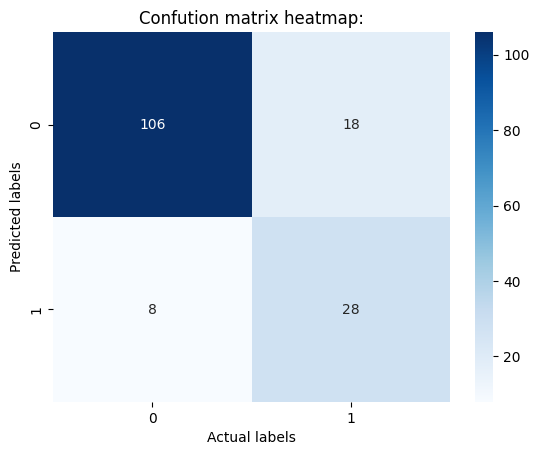

In [32]:
model_logistic = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=1000)

# Evaluating Logistic Regression Model Using RandomOversampler
Ros_LR = Model_ML(model_logistic, X_train_rov, y_train_rov)
evolution_models(Ros_LR, X_test, y_test)

Accuracy on each fold: [0.8106796116504854, 0.8300970873786407, 0.7572815533980582, 0.9029126213592233, 0.8689320388349514]
Mean accuracy: 83.4%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       124
           1       0.61      0.78      0.68        36

    accuracy                           0.84       160
   macro avg       0.77      0.82      0.79       160
weighted avg       0.86      0.84      0.84       160

------------------------------------------


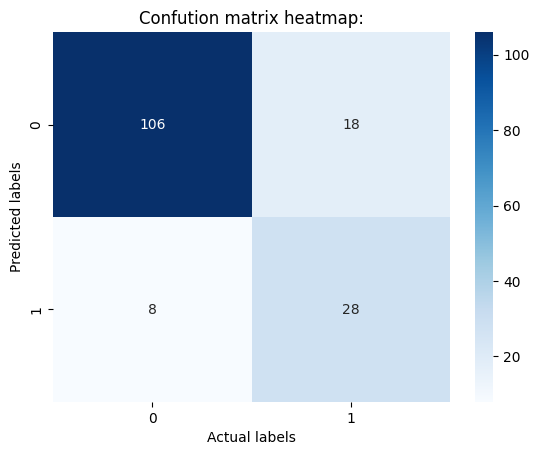

In [33]:
Smote_LR = Model_ML(model_logistic, X_train_smote, y_train_smote)
evolution_models(Smote_LR, X_test, y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validation accuracy: 85.53 %

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       124
           1       0.56      0.86      0.68        36

    accuracy                           0.82       160
   macro avg       0.76      0.83      0.78       160
weighted avg       0.86      0.82      0.83       160

------------------------------------------


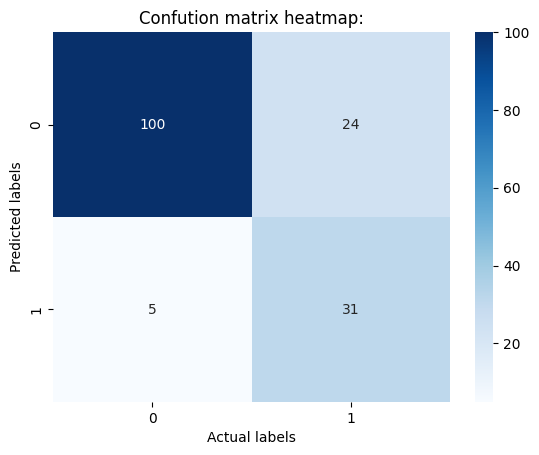

In [34]:
log_reg = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1],
    'solver': ['liblinear'],
    'penalty': ['l1','l2'],
    'max_iter': [500, 1000]
}

# Apply grid search on RandomOversampler data
grid_LR = Gridsearch_params(X_train_rov, y_train_rov, log_reg, param_grid)
evolution_models(grid_LR, X_test, y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validation accuracy: 85.73 %

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       124
           1       0.58      0.83      0.68        36

    accuracy                           0.82       160
   macro avg       0.76      0.83      0.78       160
weighted avg       0.86      0.82      0.83       160

------------------------------------------


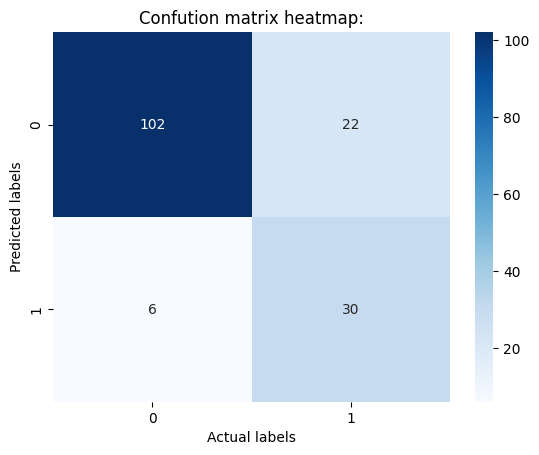

In [35]:
# Apply grid search on Smote data
grid_Lr = Gridsearch_params(X_train_smote, y_train_smote, log_reg, param_grid)
evolution_models(grid_Lr, X_test, y_test)

In [36]:
Best_parameters_logreg_smote= {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
best_logreg_smote = LogisticRegression(**Best_parameters_logreg_smote)
best_logreg_smote.fit(X_train_smote,y_train_smote)
logreg_predict_smote = best_logreg_smote.predict(X_test)
print(f"Best Logreg accuracy for smote = {accuracy_score(y_test,logreg_predict_smote)*100}")

Best_parameters_logreg_rov= {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
best_logreg_rov = LogisticRegression(**Best_parameters_logreg_rov)
best_logreg_rov.fit(X_train_smote,y_train_rov)
logreg_predict_rov = best_logreg_rov.predict(X_test)
print(f"Best Logreg accuracy for rov = {accuracy_score(y_test,logreg_predict_rov)*100}")

Best Logreg accuracy for smote = 83.125
Best Logreg accuracy for rov = 83.125


Accuracy on each fold: [0.8446601941747572, 0.8300970873786407, 0.8252427184466019, 0.883495145631068, 0.9223300970873787]
Mean accuracy: 86.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       124
           1       0.58      0.72      0.64        36

    accuracy                           0.82       160
   macro avg       0.75      0.78      0.76       160
weighted avg       0.84      0.82      0.83       160

------------------------------------------


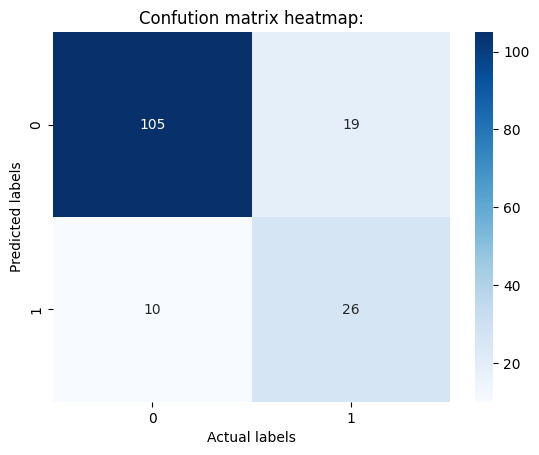

In [37]:
tree_model = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', min_samples_split=5)

# RandomOversampler
Tree = Model_ML(tree_model, X_train_rov, y_train_rov)
evolution_models(Tree, X_test, y_test)

Accuracy on each fold: [0.8543689320388349, 0.8349514563106796, 0.8300970873786407, 0.883495145631068, 0.9223300970873787]
Mean accuracy: 86.5%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       515
           1       0.66      0.94      0.77       125

    accuracy                           0.89       640
   macro avg       0.82      0.91      0.85       640
weighted avg       0.92      0.89      0.90       640

------------------------------------------


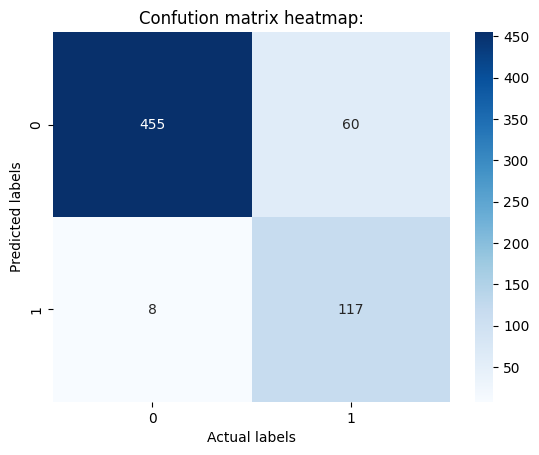

In [38]:
# Smote
Tree_smote = Model_ML(tree_model, X_train_rov, y_train_rov)
evolution_models(Tree_smote, X_train, y_train)

Accuracy on each fold: [0.912621359223301, 0.9174757281553398, 0.8495145631067961, 0.9902912621359223, 0.9902912621359223]
Mean accuracy: 93.2%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       124
           1       0.65      0.56      0.60        36

    accuracy                           0.83       160
   macro avg       0.76      0.73      0.75       160
weighted avg       0.82      0.83      0.83       160

------------------------------------------


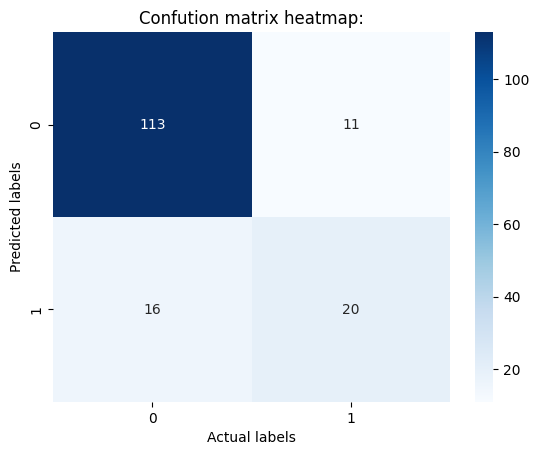

In [39]:
svm_model = SVC(kernel='rbf', C=10)

# RandomOversampler
svm_rov = Model_ML(svm_model, X_train_rov, y_train_rov)
evolution_models(svm_rov, X_test, y_test)

Accuracy on each fold: [0.9223300970873787, 0.9223300970873787, 0.8689320388349514, 0.9902912621359223, 1.0]
Mean accuracy: 94.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       124
           1       0.69      0.61      0.65        36

    accuracy                           0.85       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.84      0.85      0.85       160

------------------------------------------


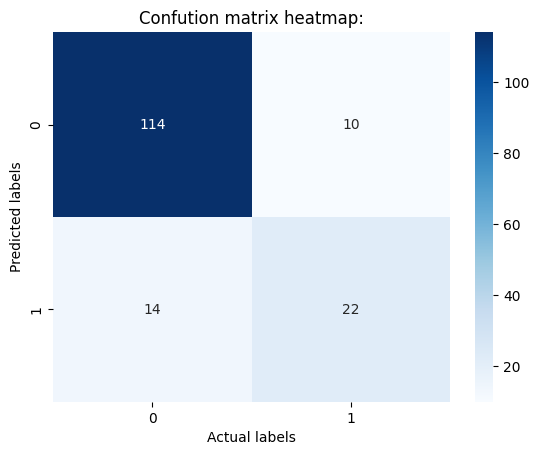

In [40]:
# smote
svm_smote = Model_ML(svm_model, X_train_smote, y_train_smote)
evolution_models(svm_smote, X_test, y_test)

In [41]:
svm_predict_rov = svm_rov.predict(X_test)
print(f"Best SVM accuracy for rov = {accuracy_score(y_test,svm_predict_rov)*100}")

svm_predict_smote = svm_smote.predict(X_test)
print(f"Best SVM accuracy for smote = {accuracy_score(y_test,svm_predict_smote)*100}")

Best SVM accuracy for rov = 85.0
Best SVM accuracy for smote = 85.0


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.6}
Best mean cross-validation accuracy: 92.91 %

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       124
           1       0.63      0.67      0.65        36

    accuracy                           0.84       160
   macro avg       0.77      0.78      0.77       160
weighted avg       0.84      0.84      0.84       160

------------------------------------------


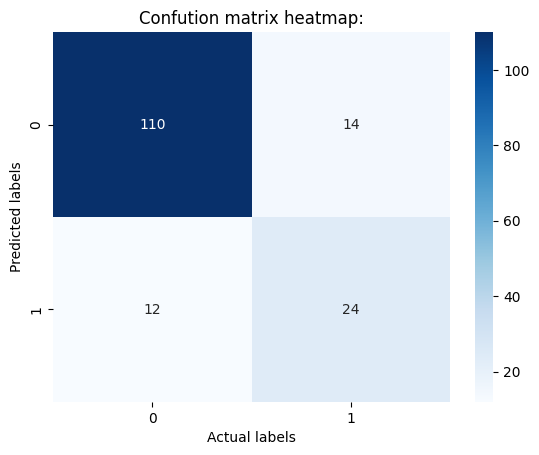

In [42]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1],
    'min_child_weight': [3, 5]
}
xgb = XGBClassifier()

# RandomSampler
xgb_rov = Gridsearch_params(X_train_rov, y_train_rov, xgb, param_grid)
evolution_models(xgb_rov, X_test, y_test)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best mean cross-validation accuracy: 91.17 %

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       124
           1       0.66      0.69      0.68        36

    accuracy                           0.85       160
   macro avg       0.78      0.79      0.79       160
weighted avg       0.85      0.85      0.85       160

------------------------------------------


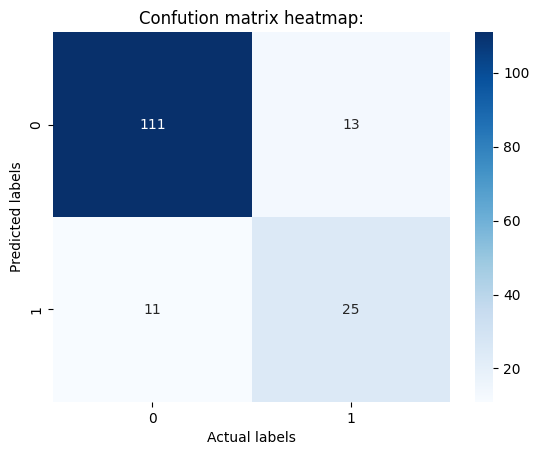

In [43]:
xgb_smote = Gridsearch_params(X_train_smote, y_train_smote, xgb, param_grid)
evolution_models(xgb_smote, X_test, y_test)

Accuracy on each fold: [0.8155339805825242, 0.8252427184466019, 0.7912621359223301, 0.9271844660194175, 0.9514563106796117]
Mean accuracy: 86.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       124
           1       0.53      0.72      0.61        36

    accuracy                           0.79       160
   macro avg       0.72      0.77      0.74       160
weighted avg       0.82      0.79      0.80       160

------------------------------------------


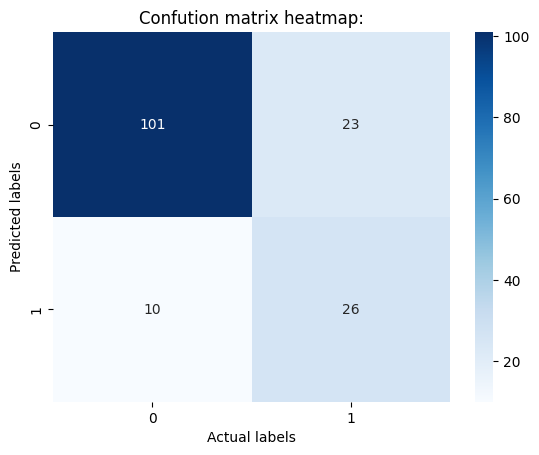

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_rov = Model_ML(knn_model, X_train_rov, y_train_rov)
evolution_models(knn_rov, X_test, y_test)

Accuracy on each fold: [0.8300970873786407, 0.7912621359223301, 0.7864077669902912, 0.9757281553398058, 0.9854368932038835]
Mean accuracy: 87.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       124
           1       0.51      0.72      0.60        36

    accuracy                           0.78       160
   macro avg       0.71      0.76      0.72       160
weighted avg       0.82      0.78      0.79       160

------------------------------------------


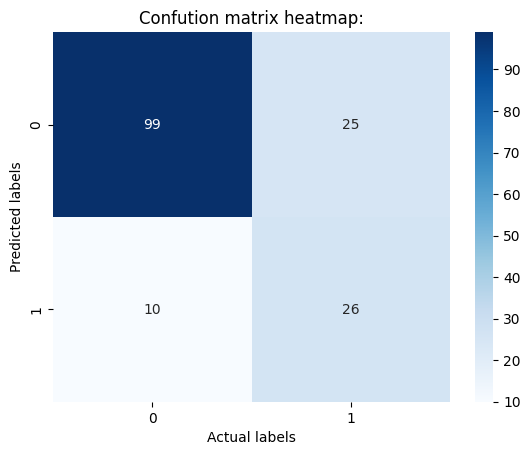

In [45]:
knn_smote = Model_ML(knn_model, X_train_smote, y_train_smote)
evolution_models(knn_smote, X_test, y_test)

In [46]:
knn_predict_rov = knn_rov.predict(X_test)
print(f"Best KNN accuracy for rov = {accuracy_score(y_test,knn_predict_rov)*100}")

knn_predict_smote = knn_smote.predict(X_test)
print(f"Best KNN accuracy for smote = {accuracy_score(y_test,knn_predict_smote)*100}")

Best KNN accuracy for rov = 78.125
Best KNN accuracy for smote = 78.125


In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#svm_model = SVC(kernel='rbf', C=10,probability=True)

voting_clf = VotingClassifier(estimators=[('knn',knn_smote),('svm', svm_model), ('logreg', best_logreg_smote), ('rf',rf),('xgb',xgb_rov),('tree',Tree_smote)], voting='hard')
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

Accuracy: 85.625


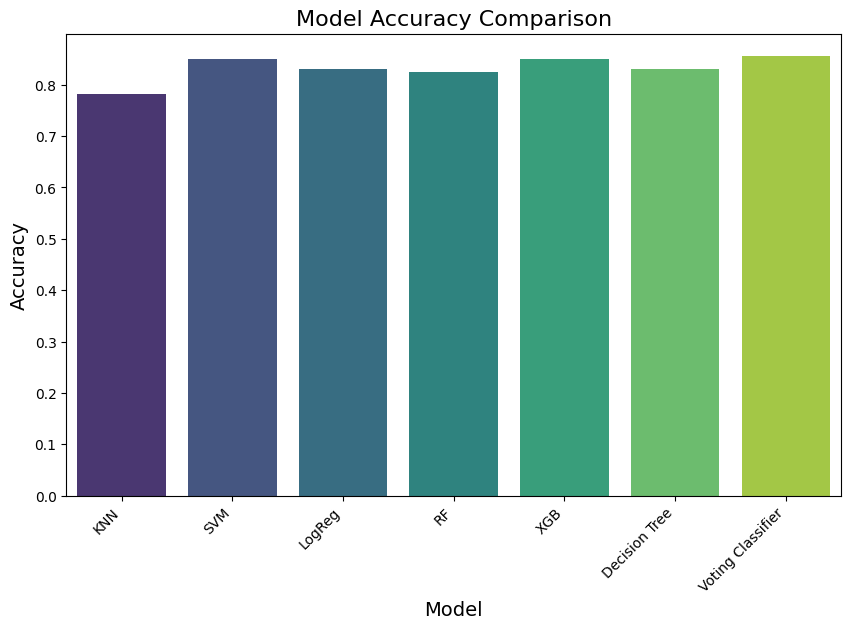

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Assuming that you've already defined your models such as knn_smote, svm_model, best_logreg_smote, Tree_smote, xgb_rov, etc.

# List of classifiers to compare
classifiers = {
    'KNN': knn_smote,
    'SVM': svm_model,
    'LogReg': best_logreg_smote,
    'RF': rf,
    'XGB': xgb_rov,
    'Decision Tree': Tree_smote,
    'Voting Classifier': voting_clf  # This is the ensemble model you're already using
}

# List to store accuracies
accuracies = []

# Train each model and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)  # Train on the SMOTE data
    y_pred = clf.predict(X_test)  # Predict on the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)

# Create a DataFrame for better visualization
import pandas as pd

# Store results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(classifiers.keys()),
    'Accuracy': accuracies
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()
